In [1]:

#ref :  http://www.neural.cz/dataset-exploration-boston-house-pricing.html

#ref :  https://archive.ics.uci.edu/ml/datasets/Housing

#ref : http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html

#ref : http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html

In [97]:
from sklearn.datasets import load_boston
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.datasets import load_boston
import pylab as pl
import matplotlib.pyplot as plt



from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=df['target']

In [7]:
# Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.8, random_state=33)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


print('Coefficients: \n', regr.coef_)

print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(X_test, y_test))


Coefficients: 
 [ -1.10180752e-01   5.00734271e-02   2.99120554e-02   3.00971741e+00
  -1.53865705e+01   4.03305527e+00  -1.35254648e-03  -1.54347630e+00
   3.22467189e-01  -1.35298720e-02  -8.39040875e-01   8.85778956e-03
  -5.84537310e-01]
Residual sum of squares: 22.04
Variance score: 0.69


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.56024108578851772, 0.5602410857

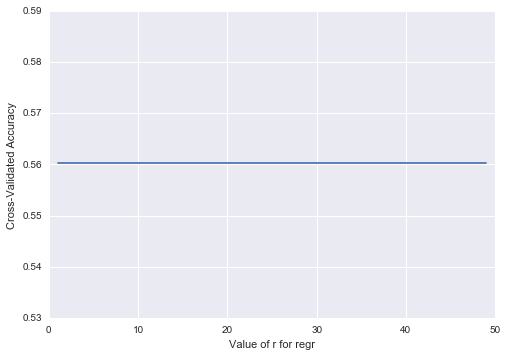

In [8]:

r_range = range(1,50)
r_scores = []
for r in r_range:
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    scores = cross_val_score(regr, X_test, y_test)
    r_scores.append(scores.mean())

print (r_scores) 

plt.plot(r_range, r_scores)
plt.xlabel('Value of r for regr')
plt.ylabel('Cross-Validated Accuracy')

In [9]:
y_train.shape

(404,)

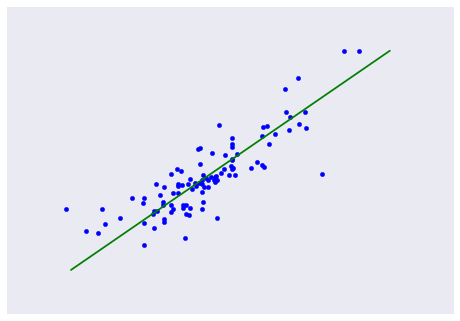

In [10]:
# Plot outputs
plt.scatter(regr.predict(X_test), y_test,  color='blue')
plt.plot([0,50],[0,50], 'g-')


plt.xticks(())
plt.yticks(())

plt.show()

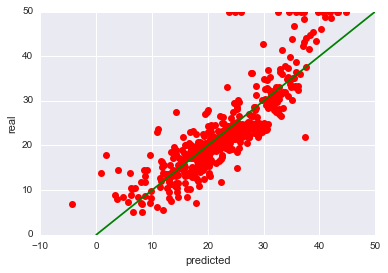

In [11]:
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target


x= pd.DataFrame(x)
linreg = LinearRegression()
linreg.fit(x,y)
p = linreg.predict(x)
err = abs(p-y)

# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64


(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

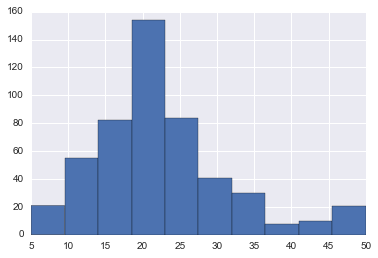

In [12]:
print (df['target'].describe())


plt.hist(df['target'])

# Set up possible group for classificarion 

In [13]:
def house_classify(x):
    if x  >=0 and  x  < 13:
        return 'cheap'
    elif  x  >=  13 and  x  < 31:
        return 'medium'
    elif  x  >=  31:
        return 'expensive'

In [14]:
df['price'] = df['target'].apply(lambda x: house_classify(x))

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,expensive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,expensive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,expensive


In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,expensive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,expensive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,expensive


In [16]:
#df_=df.copy()
df_= df.drop(['target'],axis=1)

In [17]:
df_

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,expensive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,expensive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,expensive
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,medium
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,medium
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,medium
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,medium
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,medium


In [71]:

#X = data[['Fare','Pclass', 'Age']]
#y = data['Survived']


X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
#Y = np.asarray(df['target'], dtype="|S6")
Y = np.asarray(df['price'])
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit( X, Y)


scores_1 = cross_val_score(knn, X, Y, cv=10)
#scores_2 = cross_val_score(knn, df_test_feature[['outcome']], knn.predict(df_test_feature[['total_number_bid_bidder_made','avg_number_bid_bidder_made','gap_time_max_min']]),cv=10)
print (scores_1)
#print (scores_2)

[ 0.75        0.69230769  0.76470588  0.68627451  0.78431373  0.68627451
  0.80392157  0.57142857  0.51020408  0.73469388]


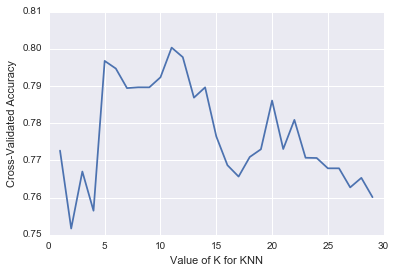

In [74]:
k_range = range(1,30)
k_scores = []
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
#Y = np.asarray(df['target'], dtype="|S6")
Y = np.asarray(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=33)

for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
	k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [93]:
k_range = range(1,30)
k_scores = []
for k in k_range:
	knn = KNeighborsClassifier(n_neighbors= k)
	knn.fit( X, Y)
	knn.predict(X_test)

	k_scores.append(knn.score(X,Y))

k_scores

[1.0,
 0.89130434782608692,
 0.88142292490118579,
 0.85573122529644263,
 0.85177865612648218,
 0.84782608695652173,
 0.84782608695652173,
 0.83003952569169959,
 0.82608695652173914,
 0.83003952569169959,
 0.81422924901185767,
 0.80434782608695654,
 0.80632411067193677,
 0.81225296442687744,
 0.81027667984189722,
 0.8162055335968379,
 0.79249011857707508,
 0.79249011857707508,
 0.79249011857707508,
 0.78458498023715417,
 0.79051383399209485,
 0.78458498023715417,
 0.78458498023715417,
 0.78458498023715417,
 0.78458498023715417,
 0.78458498023715417,
 0.78063241106719372,
 0.78260869565217395,
 0.77865612648221338]

In [91]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit( X, Y)
knn.predict(X_test)

print (knn.score(X,Y))

pd.DataFrame({'predict':knn.predict(X_test),'actual':y_test})

0.851778656126


,actual,predict
0,medium,medium
1,cheap,cheap
2,medium,medium
3,cheap,medium
4,medium,medium
5,medium,medium
6,expensive,expensive
7,medium,medium
8,expensive,expensive
9,medium,medium


[[11  0  8]
 [ 0  8 10]
 [ 6  4 80]]


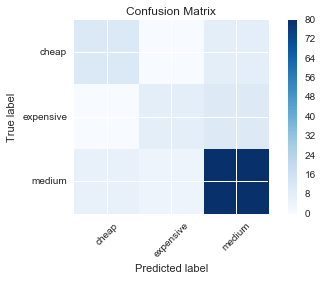

In [105]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix')
    fig.colorbar(im)

    target_names = ['cheap', 'expensive','medium']

    tick_marks = np.arange(len(target_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(target_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(target_names)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.tight_layout()
    
    
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
#print('Accuracy on Training Set: {:.3f}'.format(knn.score(X, y)))

cm = confusion_matrix(y_test, y_test_pred)
print(cm)
plot_confusion_matrix(cm)

In [106]:
dd=pd.DataFrame({'predict':knn.predict(X_test),'actual':y_test})
dd.groupby('predict').count()

,actual
predict,
cheap,17
expensive,12
medium,98
